# Import Libraries

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows',500)

# Import NEM Currently Interconnected Data Set

In [2]:
# import connections data key and inspect table
# note: system size is reported in kilowatts

filename = "NEM_CurrentlyInterconnectedDataKey.b29667e204f3.xlsx"

df_datakey = pd.read_excel(filename, skiprows=1)
df_datakey.columns = df_datakey.columns.str.strip()

df_datakey

,Column,Field,Definition
0,A,Application Id,Unique Id for each interconnection application
1,B,Matched CSI Application Number,Matched CSI application Id from the CSI Workin...
2,C,Application Status,Current status of the application in the appli...
3,D,Utility,"Investor Owned Utility (PG&E, SCE and SDG&E)"
4,E,Service City,Physical city of the project
5,F,Service Zip,Physical zip code of the project
6,G,Service County,Physical county of the project
7,H,Technology Type,Technology type is Solar PV
8,I,System Size DC,Direct current (DC) output of photovoltaic mod...
9,J,System Size AC,Alternating current (AC) output of photovoltai...


In [3]:
# create list of columns to keep in connections data by referencing the key

cols_keep = ['Application Id','Application Status','Utility','Service City','Service Zip',\
             'Service County','System Size AC','Mounting Method','Customer Sector','App Approved Date']      

In [4]:
# import connections data, remove any unwanted blank spaces at beggining or end of column headers, and inspect

filename = "NEM_CurrentlyInterconnectedDataset_2017-11-30.csv"

df_connections = pd.read_csv(filename, usecols=cols_keep, low_memory=False)
df_connections.columns = df_connections.columns.str.strip()
df_connections.head(10)

,Application Id,Application Status,Utility,Service City,Service Zip,Service County,System Size AC,Mounting Method,Customer Sector,App Approved Date
0,PGE-INT-10,Interconnected,PGE,Fairfax,94930.0,Marin,2.391360,NaN,Residential,2002-08-21
1,PGE-INT-100,Interconnected,PGE,Berkeley,94707.0,Alameda,3.669120,NaN,Residential,2002-11-15
2,PGE-INT-1000,Interconnected,PGE,Corte Madera,94925.0,Marin,2.481600,NaN,Residential,2003-04-11
3,PGE-INT-10000,Interconnected,PGE,Campbell,95008.0,Santa Clara,3.440000,NaN,Residential,2001-07-18
4,PGE-INT-100002,Interconnected,PGE,Marysville,95901.0,Yuba,17.447040,NaN,Commercial,2012-12-19
5,PGE-INT-100004,Interconnected,PGE,Kerman,93630.0,Fresno,499.075200,NaN,Industrial,2012-12-28
6,PGE-INT-100005,Interconnected,PGE,Sanger,93657.0,Fresno,499.075200,NaN,Industrial,2013-02-19
7,PGE-INT-100006,Interconnected,PGE,Manteca,95336.0,San Joaquin,5.299104,NaN,Residential,2012-11-20
8,PGE-INT-100007,Interconnected,PGE,Shingle Springs,95682.0,El Dorado,12.020736,NaN,Residential,2012-12-10
9,PGE-INT-10001,Interconnected,PGE,Davis,95616.0,Yolo,2.150000,NaN,Residential,2001-07-10


In [5]:
# examine the columns, look at missing data
# Note: a data type known as string in Python is known as object in Pandas

df_connections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699584 entries, 0 to 699583
Data columns (total 10 columns):
Application Id        699584 non-null object
Application Status    699583 non-null object
Utility               699583 non-null object
Service City          699583 non-null object
Service Zip           699583 non-null float64
Service County        699583 non-null object
System Size AC        699583 non-null float64
Mounting Method       470697 non-null object
Customer Sector       699583 non-null object
App Approved Date     699583 non-null object
dtypes: float64(2), object(8)
memory usage: 53.4+ MB


In [6]:
# clean data of NaN (except in columns 'Application Id' and 'Mounting Method')
# always will be an 'Application Id' and 'Mounting Method' useful for exploratory data analysis
# tested for NaN in all columns
# only line is row 699583: 'Application Id' = 'Generated 2018-01-08T10:24:58.981957'     

df_connections[df_connections['App Approved Date'].isnull() == True]

,Application Id,Application Status,Utility,Service City,Service Zip,Service County,System Size AC,Mounting Method,Customer Sector,App Approved Date
699583,Generated 2018-01-08T10:24:58.981957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# drop the erroneous row(s) of data

df_connections.drop(699583,inplace=True)


# validate the row has been dropped and there are no more NaN values in the 'App Approved Date' column

df_connections[df_connections['App Approved Date'].isnull() == True]

,Application Id,Application Status,Utility,Service City,Service Zip,Service County,System Size AC,Mounting Method,Customer Sector,App Approved Date


In [8]:
# convert data type of 'Service Zip' from float to string

df_connections['Service Zip'] = df_connections['Service Zip'].map(str)
df_connections['Service Zip']=[i.split('.')[0] for i in df_connections['Service Zip']]

df_connections.head()

,Application Id,Application Status,Utility,Service City,Service Zip,Service County,System Size AC,Mounting Method,Customer Sector,App Approved Date
0,PGE-INT-10,Interconnected,PGE,Fairfax,94930,Marin,2.39136,NaN,Residential,2002-08-21
1,PGE-INT-100,Interconnected,PGE,Berkeley,94707,Alameda,3.66912,NaN,Residential,2002-11-15
2,PGE-INT-1000,Interconnected,PGE,Corte Madera,94925,Marin,2.48160,NaN,Residential,2003-04-11
3,PGE-INT-10000,Interconnected,PGE,Campbell,95008,Santa Clara,3.44000,NaN,Residential,2001-07-18
4,PGE-INT-100002,Interconnected,PGE,Marysville,95901,Yuba,17.44704,NaN,Commercial,2012-12-19


In [9]:
# convert data type of 'App Approved Date' from object to DateTime

df_connections['App Approved Date'] = pd.to_datetime(df_connections['App Approved Date'])

print(type(df_connections['App Approved Date'][1]))

<class 'pandas._libs.tslib.Timestamp'>


In [10]:
# create columns for 'Year' and 'Month'

df_connections['Year'] = pd.DatetimeIndex(df_connections['App Approved Date']).year
df_connections['Month'] = pd.DatetimeIndex(df_connections['App Approved Date']).month


# convert data type of 'Year' and 'Month' from float to int

df_connections['Year'] = df_connections['Year'].apply(lambda x: int(x))
df_connections['Month'] = df_connections['Month'].apply(lambda x: int(x))

df_connections.head()

,Application Id,Application Status,Utility,Service City,Service Zip,Service County,System Size AC,Mounting Method,Customer Sector,App Approved Date,Year,Month
0,PGE-INT-10,Interconnected,PGE,Fairfax,94930,Marin,2.39136,NaN,Residential,2002-08-21,2002,8
1,PGE-INT-100,Interconnected,PGE,Berkeley,94707,Alameda,3.66912,NaN,Residential,2002-11-15,2002,11
2,PGE-INT-1000,Interconnected,PGE,Corte Madera,94925,Marin,2.48160,NaN,Residential,2003-04-11,2003,4
3,PGE-INT-10000,Interconnected,PGE,Campbell,95008,Santa Clara,3.44000,NaN,Residential,2001-07-18,2001,7
4,PGE-INT-100002,Interconnected,PGE,Marysville,95901,Yuba,17.44704,NaN,Commercial,2012-12-19,2012,12


## Explore NEM Currently Connected Data Set

In [11]:
# find the total installed solar capacity
# 5,723,587 Kilowatts (i.e. 5.7 GigaWatts)

df_connections['System Size AC'].sum()

5723587.142594158

In [12]:
df_connections['Customer Sector'].value_counts()

Residential         679262
Commercial           15844
Industrial            2302
Military               782
Educational            757
Non-Profit             374
Other Government       262
Name: Customer Sector, dtype: int64

In [13]:
# find the total installed solar capacity by 'Customer Sector'

df_capacitytype = (df_connections
                  .groupby(['Customer Sector'],as_index=False))['System Size AC'].agg({'System Size AC': 'sum', 'Count': 'count', 'Avg Size': 'mean'})

df_capacitytype.sort_values('System Size AC', ascending=False, inplace=True)
df_capacitytype

,Customer Sector,System Size AC,Count,Avg Size
6,Residential,3.640075e+06,679262,5.358867
0,Commercial,1.291666e+06,15844,81.524001
2,Industrial,5.411818e+05,2302,235.092009
1,Educational,1.502579e+05,757,198.491235
5,Other Government,6.701606e+04,262,255.786492
4,Non-Profit,1.874826e+04,374,50.129029
3,Military,1.464208e+04,782,18.723887


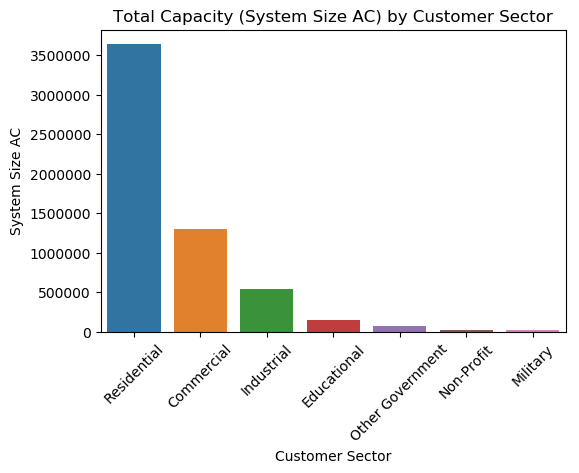

In [14]:
#sns.barplot(x='Customer Sector', y='System Size AC', data=df_capacitytype)

# visualize the installed capacity by 'Customer Sector'

plt.figure(figsize=(6, 4), dpi=100)
x = df_capacitytype['Customer Sector']
y = df_capacitytype['System Size AC']
sns.barplot(x,y)
plt.xticks(rotation=45)
plt.title('Total Capacity (System Size AC) by Customer Sector')
#plt.show()
plt.savefig('Total Capacity (System Size AC) by Customer Sector.png');


In [15]:
# find the total installed solar capacity by 'Customer Sector' > 1 MW

mask = (df_connections['System Size AC'] > 1000)

df_capacitytype1000 = (df_connections[mask]
                  .groupby(['Customer Sector'],as_index=False))['System Size AC'].agg({'System Size AC': 'sum', 'Count': 'count', 'Avg Size': 'mean'})

df_capacitytype1000.sort_values('System Size AC', ascending=False, inplace=True)
df_capacitytype1000

,Customer Sector,System Size AC,Count,Avg Size
2,Industrial,29520.976245,26,1135.422163
4,Other Government,15379.028000,5,3075.805600
0,Commercial,10702.293984,9,1189.143776
3,Military,5784.160000,3,1928.053333
1,Educational,1023.971000,1,1023.971000


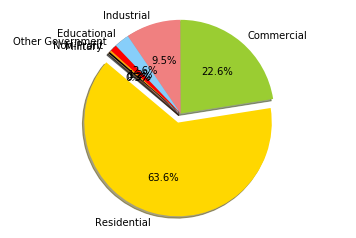

In [16]:
# plot total installed solar capacity by 'Customer Sector'

labels = df_capacitytype['Customer Sector']
sizes = df_capacitytype['System Size AC']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'orange', 'black']
explode = (0.1, 0, 0, 0, 0, 0, 0)  # explode 1st slice
 
# plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [17]:
# find the value counts of 'Application Status'

df_connections['Application Status'].value_counts()

Interconnected    699583
Name: Application Status, dtype: int64

In [18]:
# find the value counts of 'Mounting Method'

df_connections['Mounting Method'].value_counts()

Rooftop     459685
Ground       10321
Mixed          664
multiple        27
Name: Mounting Method, dtype: int64

In [19]:
# create dataframe to visualize the installed capacity per year

df_year = (df_connections.groupby(['Year'],as_index=False)['System Size AC'].sum())

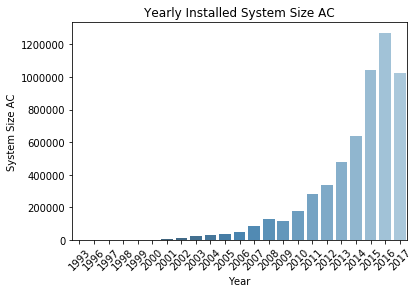

In [20]:
# visualize the installed capacity per year

x = df_year['Year']
y = df_year['System Size AC']
sns.barplot(x,y,palette="Blues_d")
plt.xticks(rotation=45)
plt.title('Yearly Installed System Size AC')
plt.show()

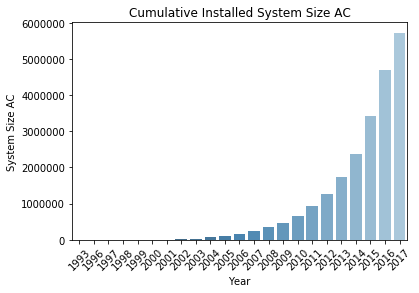

In [21]:
# visualize the cumulative installed capacity per year

x = df_year['Year']
y = df_year['System Size AC'].cumsum()
sns.barplot(x,y,palette="Blues_d")
plt.xticks(rotation=45)
plt.title('Cumulative Installed System Size AC')
plt.show()

In [22]:
# create dataframe to visualize the installed capacity per year by Residential Customer Sector

df_customersector = df_connections[df_connections['Customer Sector'] == 'Residential']

df_csyear = (df_customersector.groupby(['Year'],as_index=False))['System Size AC'].agg({'System Size AC': 'sum', 'Installations': 'count', 'Avg Size': 'mean'})

df_csyear

,Year,System Size AC,Installations,Avg Size
0,1993,11.073808,1,11.073808
1,1996,2.353684,1,2.353684
2,1997,19.271680,5,3.854336
3,1998,73.321952,18,4.073442
4,1999,339.524233,90,3.772491
5,2000,305.799364,90,3.397771
6,2001,2984.138097,926,3.222611
7,2002,6084.782651,1722,3.533556
8,2003,10825.895114,2674,4.048577
9,2004,17730.202798,4222,4.199480


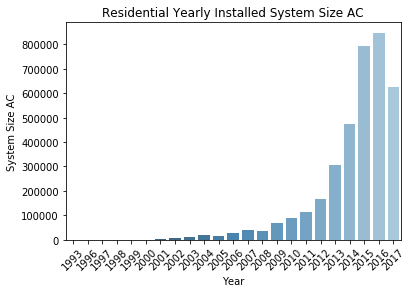

In [23]:
# visualize the installed capacity per year by Residential Customer Sector

x = df_csyear['Year']
y = df_csyear['System Size AC']
sns.barplot(x,y,palette="Blues_d")
plt.xticks(rotation=45)
plt.title('Residential Yearly Installed System Size AC')
plt.show()

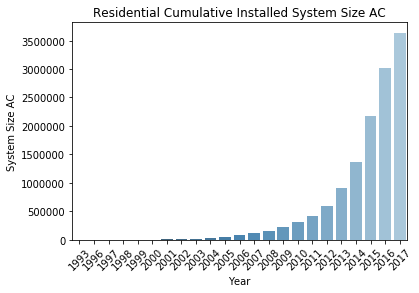

In [24]:
# visualize the cumulative installed capacity per year by Residential Customer Sector

x = df_csyear['Year']
y = df_csyear['System Size AC'].cumsum()
sns.barplot(x,y,palette="Blues_d")
plt.xticks(rotation=45)
plt.title('Residential Cumulative Installed System Size AC')
plt.show()

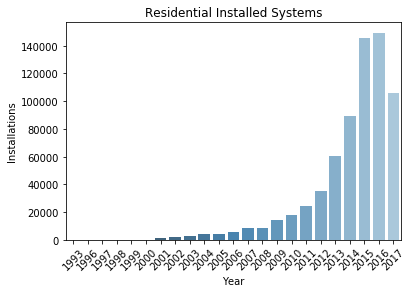

In [25]:
# visualize the number of installations per year by Residential Customer Sector

x = df_csyear['Year']
y = df_csyear['Installations']
sns.barplot(x,y,palette="Blues_d")
plt.xticks(rotation=45)
plt.title('Residential Installed Systems')
plt.show()

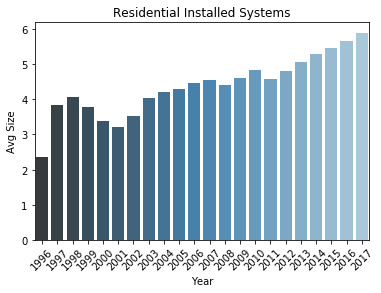

In [26]:
# visualize the number of installations per year by Residential Customer Sector

df_csyearsize = df_csyear[df_csyear['Year'] > 1993]

x = df_csyearsize['Year']
y = df_csyearsize['Avg Size']
sns.barplot(x,y,palette="Blues_d")
plt.xticks(rotation=45)
plt.title('Residential Installed Systems')
plt.show()

# Select data for analysis

In [27]:
# Customer Sector: 'Residential', Service Zip: All, System Size AC: Sum

mask = (df_connections['Customer Sector'] == 'Residential')

df_capacity = (df_connections[mask].
               groupby(['Service Zip'], as_index=False))['System Size AC'].sum()

df_capacity.set_index(['Service Zip'], inplace=True)
df_capacity.sort_index(inplace=True)
df_capacity.head()

,System Size AC
Service Zip,
90001,266.045
90002,278.355
90008,107.338
90017,8.263
90022,432.768


In [28]:
# pickle df_capacity

df_capacity.to_pickle('01_df_capacity.pkl')

In [29]:
# find the total number of unique 'Service Zip' (i.e. Zip Codes)
# Note: there are 1593 unique Service Zip in the Connections DataFrame out of a total X Zip Codes in California

df_capacity.size

1546

In [30]:
# export unique 'Service Zip' for comparison to list of complete CA Zip Codes found online

df_index = df_capacity.reset_index()
df_index['Service Zip'].to_csv('servicezips.csv')